# Creating a spectral plot

One exercise to go through to practice some of the code that is talked about in other notebooks is to create a spectral plot.  Doing this involves opening each band of a raster and pulling out a specific pixel's value.  If the raster is small enough we wouldn't have to do this for a single point it would be easy enough to load the whole raster into memory.  If your raster is more than a few gigbytes, however this may not be an option.

### Extracting the data

In [1]:
import numpy as np
import rasterio

In [2]:
filepath_h20 = '../input_data/f150131t01p00r10_refl/f150131t01p00r10_h2o_v1'
filepath_img = '../input_data/f170508t01p00r11rdn_e/f170508t01p00r11rdn_e_sc01_ort_img'

In [3]:
# Specify the row and column of the pixel whose values you want to plot
row, col = (0, 1593)

In [4]:
%%time
with rasterio.open(filepath_img, 'r') as src:
    array = np.full(src.count, np.nan)
    for i in src.indexes:
        # Read the layer from the Dataset Reader object
        new_value = src.read(i)[row, col]
        # Because the indexes are start from 1 but the elements of an array start from 0 we need to adjust 
        # by setting the new_value to the position i-1 
        array[i-1] = new_value
        print('added a new value to the array ', new_value)

added a new value to the array  3477
added a new value to the array  4144
added a new value to the array  4568
added a new value to the array  5887
added a new value to the array  8187
added a new value to the array  8801
added a new value to the array  8652
added a new value to the array  8690
added a new value to the array  9895
added a new value to the array  10596
added a new value to the array  10639
added a new value to the array  10613
added a new value to the array  10427
added a new value to the array  10122
added a new value to the array  9932
added a new value to the array  9672
added a new value to the array  9320
added a new value to the array  9348
added a new value to the array  9373
added a new value to the array  9281
added a new value to the array  9048
added a new value to the array  8943
added a new value to the array  8916
added a new value to the array  8675
added a new value to the array  8613
added a new value to the array  8389
added a new value to the array  8

### Make the plot

In [5]:
import matplotlib.pyplot as plt 

In [6]:
# Get the indexes from the raster
with rasterio.open(filepath_img, 'r') as src:
    indexes = src.indexes

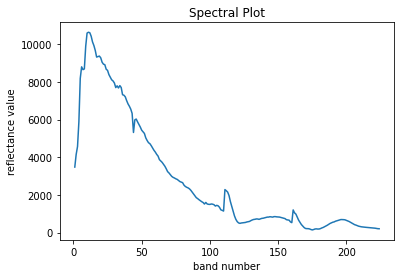

In [7]:
plt.plot(indexes, array)
plt.xlabel('band number') 
# naming the y axis 
plt.ylabel('reflectance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()

I used band number in this plot because it was easy, but you might be more interested in plotting the actual wavelenght.  If you have of wavelengths you could just as easily use those values on the x-axis.

In [8]:
import numpy as np

In [9]:
my_fake_wavelengths = np.linspace(start=400, stop=2450, num=224)

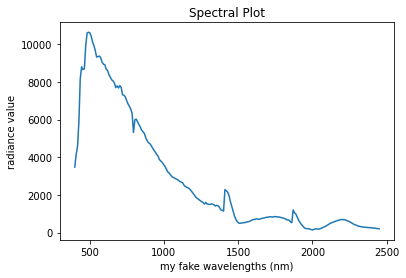

In [10]:
plt.plot(my_fake_wavelengths, array)
plt.xlabel('my fake wavelengths (nm)') 
# naming the y axis 
plt.ylabel('radiance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()